In [22]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [23]:
df = pd.read_csv('final_data.csv')
df = df.drop('Unnamed: 0', axis = 1) # remove extra column

In [24]:
cor_map = df.corr()
cor_map.style.background_gradient(cmap='coolwarm', axis=None)

## Cleanup
1. set seed; 
2. train/test/split
3. throw a cute lil multiple regression together

In [25]:
response_var = df[['SalePrice']] # separate the y from the features
feats = df.drop('SalePrice', axis = 1) # features

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
np.random.seed(1) # for reprodusability of results
Xtrain, Xtest, ytrain, ytest = train_test_split(feats, response_var)

## Multiple Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
ols = LinearRegression() # create an instance of LinearRegression
ols.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [29]:
ols.fit(Xtrain[['GrLivArea', 'OverallQual']], ytrain)
print(ols.coef_)
print(ols.intercept_)
print()

[[0.43014844 0.16795603]]
[7.87528286]



In [30]:
from sklearn.metrics import mean_squared_error, make_scorer
make_scorer?
cross_val_score?

In [31]:
def multModel(features):
    '''Create a multiple linear regression model with the specified features.
    If > 1 variable, 
    Make sure you pass a list into the function
    '''
    ols.fit(Xtrain[features], ytrain)
    print(f"features: {features}")
    print(f"coefs: {ols.coef_}")
    print(f"intercept: {ols.intercept_}")
    print(f"train R2: {ols.score(Xtrain[features],ytrain)}")
    print(f"test R2: {ols.score(Xtest[features],ytest)}")

In [32]:
multModel(['GrLivArea','OverallQual'])

features: ['GrLivArea', 'OverallQual']
coefs: [[0.43014844 0.16795603]]
intercept: [7.87528286]
train R2: 0.7367129056982162
test R2: 0.7901751880144675


In [33]:
print("RMSE on Training set :", rmse_cv_train(ols).mean())
print("RMSE on Test set :", rmse_cv_test(ols).mean())

NameError: name 'rmse_cv_train' is not defined

In [35]:
multModel(['GrLivArea','OverallQual','GarageCars'])
# RMSE on Training set : 0.20183226152069134
# RMSE on Test set : 0.1838143964540892

features: ['GrLivArea', 'OverallQual', 'GarageCars']
coefs: [[0.3624365  0.13589309 0.13507718]]
intercept: [8.32458268]
train R2: 0.7754245315534731
test R2: 0.8083848925718107


In [36]:
multModel(['GrLivArea','OverallQual','GarageCars','Fireplaces'])

features: ['GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces']
coefs: [[0.32836764 0.13100417 0.13101996 0.07300327]]
intercept: [8.57085802]
train R2: 0.7817550953343263
test R2: 0.8140128298363682


In [37]:

# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)
def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, Xtrain[['GrLivArea','OverallQual', 'GarageCars','Fireplaces','HeatingQC']], ytrain, scoring = scorer, cv = 10))
    return(rmse)
def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, Xtest[['GrLivArea','OverallQual', 'GarageCars','Fireplaces','HeatingQC']], ytest, scoring = scorer, cv = 10))
    return(rmse)
print("RMSE on Training set :", rmse_cv_train(ols).mean())
print("RMSE on Test set :", rmse_cv_test(ols).mean())

RMSE on Training set : 0.17911857034089232
RMSE on Test set : 0.16818476591181514


In [38]:
multModel(['GrLivArea','OverallQual','GarageCars','Fireplaces','HeatingQC'])

features: ['GrLivArea', 'OverallQual', 'GarageCars', 'Fireplaces', 'HeatingQC']
coefs: [[0.33660366 0.11482399 0.12407488 0.07842209 0.0516883 ]]
intercept: [8.40406633]
train R2: 0.7940531760302814
test R2: 0.8226973226591564


## statsmodels for more info

In [39]:
import statsmodels.api as sm

In [40]:
def multModelSM(features):
    X_add_const = sm.add_constant(Xtrain[features])
    ols = sm.OLS(ytrain, X_add_const)
    ans = ols.fit()
    print(ans.summary())

In [41]:
multModelSM(['GrLivArea','OverallQual'])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1528.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.59e-317
Time:                        17:30:51   Log-Likelihood:                 192.84
No. Observations:                1095   AIC:                            -379.7
Df Residuals:                    1092   BIC:                            -364.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8753      0.150     52.444      

In [42]:
multModelSM(['GrLivArea','OverallQual','GarageCars'])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     1256.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:                 279.91
No. Observations:                1095   AIC:                            -551.8
Df Residuals:                    1091   BIC:                            -531.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.3246      0.143     58.391      

In [43]:
multModelSM(['GrLivArea','OverallQual','Fireplaces','GarageCars'])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     976.1
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:                 295.56
No. Observations:                1095   AIC:                            -581.1
Df Residuals:                    1090   BIC:                            -556.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.5709      0.147     58.198      

In [44]:
multModelSM(['GrLivArea','OverallQual','Fireplaces','GarageCars','HeatingQC'])

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     839.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:30:51   Log-Likelihood:                 327.32
No. Observations:                1095   AIC:                            -642.6
Df Residuals:                    1089   BIC:                            -612.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.4041      0.145     58.114      

## trying a lasso

In [45]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [62]:
lasso.set_params(normalize=True, max_iter = 10000) # standard scalar is giving us grief :/

lasso_scores_train = []
lasso_scores_test = []
coefs_lasso  = []

alphas = np.linspace(0.000001, .01,100)

for alpha in alphas:
    lasso.set_params(alpha=alpha) # try new alpha level
    lasso.fit(Xtrain, ytrain) # fit test data
    lasso_scores_train.append(lasso.score(Xtrain,ytrain)) # record R2 train
    lasso_scores_test.append(lasso.score(Xtest,ytest)) # record R2 test
    coefs_lasso.append(lasso.coef_) # record coef values
    
lasso_scores_train = pd.Series(lasso_scores_train) 
lasso_scores_test  = pd.Series(lasso_scores_test)
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = Xtrain.columns)  
coefs_lasso.T

,0.000001,0.000102,0.000203,0.000304,0.000405,0.000506,0.000607,0.000708,0.000809,0.000910,...,0.009091,0.009192,0.009293,0.009394,0.009495,0.009596,0.009697,0.009798,0.009899,0.010000
PavedDrive,0.007534,0.002660,0.001842,0.000406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
Functional,0.049001,0.043932,0.038451,0.033443,0.028725,0.023994,0.019126,0.014406,0.010093,0.005549,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
OverallQual,0.058077,0.069301,0.074414,0.078949,0.082982,0.086314,0.089569,0.092610,0.094995,0.096342,...,0.013879,0.011441,0.009003,0.006566,0.004128,0.00169,0.0,0.0,0.0,0.0
KitchenQual,0.043756,0.047992,0.048442,0.049034,0.049176,0.049569,0.049936,0.050068,0.049849,0.049012,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
LotFrontage,-0.000719,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Partial,0.115701,0.093654,0.063606,0.035449,0.011216,0.004982,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
MSZoning_FV,0.401126,0.004699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0
MSZoning_RH,0.489040,0.028945,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.00000,-0.0,-0.0,-0.0,-0.0
MSZoning_RL,0.376443,0.000000,0.000000,0.000000,0.002113,0.007785,0.011453,0.012835,0.013176,0.012573,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0


In [47]:
results = pd.concat((lasso_scores_train, lasso_scores_test),axis=1)

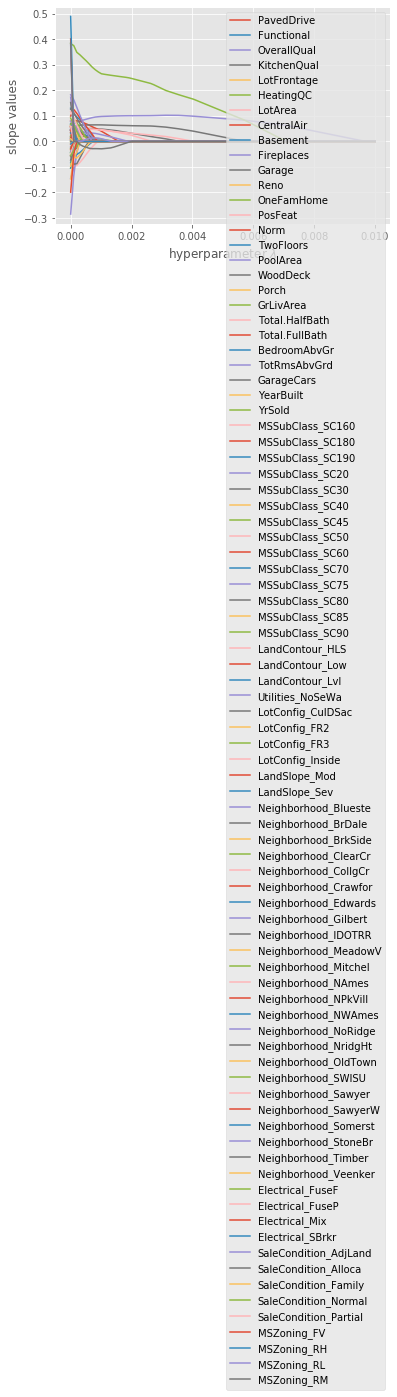

In [48]:
for name in coefs_lasso.columns:
    plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'slope values')
plt.legend(loc=)   
# what is going on  between .000 and .002

Text(0, 0.5, 'slope values')

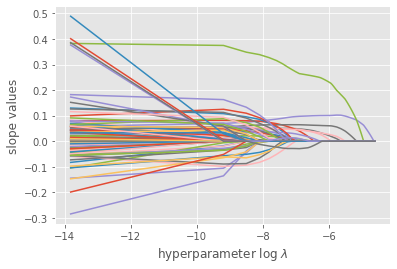

In [49]:
for name in coefs_lasso.columns:
    plt.plot(np.log(coefs_lasso.index), coefs_lasso[name], label=name)
plt.xlabel(r'hyperparameter log $\lambda$')
plt.ylabel(r'slope values') 

In [50]:
# Hyperparameters chosen might have been too large. Let's try again with a smaller alpha,
#and smaller range of alphas

## lasso attempt #2

In [51]:
lasso = Lasso()
lasso.set_params(normalize=True, max_iter = 10000) # standard scalar is giving us grief :/

l_scores_train = []
l_scores_test = []
l_coefs  = []

alphas = np.linspace(0.000001, .001,100)

for alpha in alphas:
    lasso.set_params(alpha=alpha) # try new alpha level
    lasso.fit(Xtrain, ytrain) # fit test data
    l_scores_train.append(lasso.score(Xtrain,ytrain)) # record R2 train
    l_scores_test.append(lasso.score(Xtest,ytest)) # record R2 test
    l_coefs.append(lasso.coef_) # record coef values
    
l_scores_train = pd.Series(lasso_scores_train) 
l_scores_test  = pd.Series(lasso_scores_test)
l_coefs = pd.DataFrame(l_coefs, index = alphas, columns = Xtrain.columns)  
l_coefs.head()

,PavedDrive,Functional,OverallQual,KitchenQual,LotFrontage,HeatingQC,LotArea,CentralAir,Basement,Fireplaces,...,Electrical_SBrkr,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0.000001,0.007534,0.049001,0.058077,0.043756,-0.000719,0.023117,0.053435,0.080106,0.129725,0.029090,...,-0.010457,0.172732,0.151977,0.009705,0.091107,0.115701,0.401126,0.489040,0.376443,0.385759
0.000011,0.006183,0.048692,0.059544,0.044331,-0.000135,0.022770,0.052083,0.080192,0.126737,0.028993,...,-0.004677,0.160234,0.141694,0.004081,0.088884,0.114039,0.315740,0.395165,0.293208,0.299586
0.000021,0.004972,0.048197,0.060915,0.044991,-0.000000,0.022540,0.050437,0.080892,0.123825,0.028827,...,-0.000000,0.147506,0.131859,0.000000,0.086781,0.112303,0.228761,0.302719,0.208384,0.213970
0.000031,0.003903,0.047594,0.062379,0.045697,-0.000000,0.022357,0.049243,0.082058,0.120531,0.028945,...,0.000000,0.135252,0.123478,0.000000,0.085539,0.111329,0.142875,0.209811,0.124114,0.129334
0.000041,0.002869,0.046966,0.063832,0.046371,-0.000000,0.022152,0.048101,0.083321,0.117336,0.029053,...,0.000000,0.122984,0.114670,0.000000,0.084279,0.110290,0.057178,0.116699,0.039921,0.044888


In [80]:
alphadf = l_coefs.T
np.sum(alphadf.ne(0),axis=0) # count coefs that have not been shrunk to 0

0.000001    87
0.000011    85
0.000021    78
0.000031    77
0.000041    76
            ..
0.000960    14
0.000970    14
0.000980    14
0.000990    13
0.001000    13
Length: 100, dtype: int64

Text(0.5, 0, 'hyperparameter $\\lambda$')

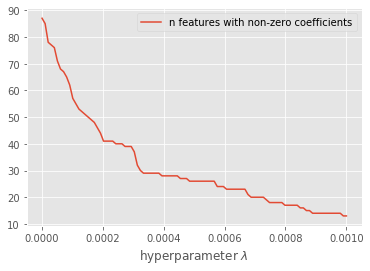

In [84]:
plt.plot(np.sum(alphadf.ne(0),axis=0),label='n features with non-zero coefficients')
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')

Text(0, 0.5, 'slope values')

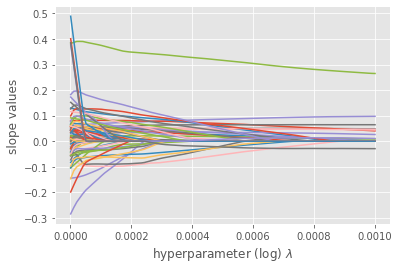

In [87]:
for name in l_coefs.columns:
    plt.plot(l_coefs.index, l_coefs[name], label=name)
plt.xlabel(r'hyperparameter (log) $\lambda$')
plt.ylabel(r'slope values')
#plt.legend(loc=1)   
# what is going on  between .000 and .002

Text(0, 0.5, 'slope values')

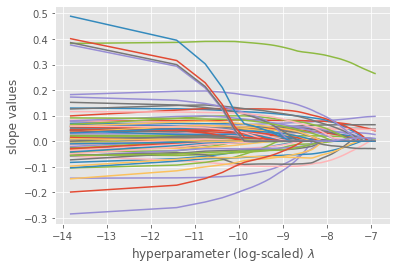

In [88]:
for name in l_coefs.columns:
    plt.plot(np.log(l_coefs.index), l_coefs[name], label=name)
plt.xlabel(r'hyperparameter (log-scaled) $\lambda$')
plt.ylabel(r'slope values')
#plt.legend(loc=1)   
# what is going on  between .000 and .002

In [53]:
results2 = pd.concat((l_scores_train, l_scores_test),axis=1)

In [54]:
print(f"alpha: {alphas[0]}")
print(f"training score: {l_scores_train[0]}")
print(f"test score: {l_scores_test[0]}")

alpha: 1e-06
training score: 0.9088448163430193
test score: 0.8894007714090993


In [55]:
abs(l_coefs.iloc[0,0:]).sort_values(ascending=False).head(15)

MSZoning_RH              0.489040
MSZoning_FV              0.401126
MSZoning_RM              0.385759
GrLivArea                0.382665
MSZoning_RL              0.376443
Utilities_NoSeWa         0.284766
Electrical_Mix           0.199093
Neighborhood_StoneBr     0.182277
SaleCondition_AdjLand    0.172732
SaleCondition_Alloca     0.151977
Neighborhood_MeadowV     0.147370
PoolArea                 0.144938
Basement                 0.129725
Neighborhood_NridgHt     0.126024
SaleCondition_Partial    0.115701
Name: 1e-06, dtype: float64

In [56]:
print(f"alpha: {alphas[1]}")
print(f"training score: {l_scores_train[1]}")
print(f"test score: {l_scores_test[1]}")

alpha: 1.1090909090909092e-05
training score: 0.8991354415410611
test score: 0.8922046566990788


In [57]:
abs(l_coefs.iloc[1,0:]).sort_values(ascending=False).head(15)

MSZoning_RH              0.395165
GrLivArea                0.386672
MSZoning_FV              0.315740
MSZoning_RM              0.299586
MSZoning_RL              0.293208
Utilities_NoSeWa         0.260026
Neighborhood_StoneBr     0.195400
Electrical_Mix           0.172295
SaleCondition_AdjLand    0.160234
PoolArea                 0.143638
SaleCondition_Alloca     0.141694
Neighborhood_NridgHt     0.139852
Basement                 0.126737
Neighborhood_Crawfor     0.121555
Neighborhood_MeadowV     0.116002
Name: 1.1090909090909092e-05, dtype: float64

In [58]:
print(f"alpha: {alphas[2]}")
print(f"training score: {l_scores_train[2]}")
print(f"test score: {l_scores_test[2]}")

alpha: 2.1181818181818184e-05
training score: 0.8905482014794666
test score: 0.891974438710154


In [59]:
abs(l_coefs.iloc[2,0:]).sort_values(ascending=True).head(50)

Neighborhood_Blueste    0.000000
SaleCondition_Family    0.000000
MSSubClass_SC60         0.000000
LotFrontage             0.000000
MSSubClass_SC40         0.000000
MSSubClass_SC190        0.000000
Electrical_SBrkr        0.000000
BedroomAbvGr            0.000000
Neighborhood_SWISU      0.000000
Neighborhood_SawyerW    0.000000
YearBuilt               0.000698
Neighborhood_NAmes      0.001280
TotRmsAbvGrd            0.001890
YrSold                  0.003783
PavedDrive              0.004972
Porch                   0.005143
LotConfig_Inside        0.005409
Reno                    0.006119
Neighborhood_NWAmes     0.008142
Neighborhood_CollgCr    0.008193
Neighborhood_Mitchel    0.011060
Neighborhood_Sawyer     0.012580
WoodDeck                0.012876
OneFamHome              0.013246
MSSubClass_SC30         0.015158
Garage                  0.016967
Neighborhood_Timber     0.022511
HeatingQC               0.022540
MSSubClass_SC45         0.024008
LotConfig_FR2           0.024060
MSSubClass

In [60]:
print(f"alpha: {alphas[3]}")
print(f"training score: {l_scores_train[3]}")
print(f"test score: {l_scores_test[3]}")

alpha: 3.127272727272727e-05
training score: 0.8809736266713222
test score: 0.8875258676110632


In [61]:
abs(l_coefs.iloc[3,0:]).sort_values(ascending=False).head(15)

GrLivArea                0.390530
Utilities_NoSeWa         0.221357
MSZoning_RH              0.209811
Neighborhood_StoneBr     0.191898
MSZoning_FV              0.142875
PoolArea                 0.138774
Neighborhood_NridgHt     0.137186
SaleCondition_AdjLand    0.135252
MSZoning_RM              0.129334
Neighborhood_Crawfor     0.127317
MSZoning_RL              0.124114
SaleCondition_Alloca     0.123478
Electrical_Mix           0.122381
Basement                 0.120531
SaleCondition_Partial    0.111329
Name: 3.127272727272727e-05, dtype: float64